## Pima Diabetes - EDA (Exploratory Data Analysis)

### Description of Pima Diabetes dataset
#### Data Set Information:
Several constraints were placed on the selection of these instances from a larger database. In
particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is
an adaptive learning routine that generates and executes digital analogy of perceptron-like
devices. It is a unique algorithm; see the paper for details.

#### Attribute Information:
- Number of times pregnant 
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
- Diastolic blood pressure (mm Hg) 
- Triceps skin fold thickness (mm) 
- 2-Hour serum insulin (mu U/ml) 
- Body mass index (weight in kg/(height in m)^2) 
- Diabetes pedigree function
- Age (years) 
- Class variable (0 or 1) **

#### Attribute Description
1. Pregnancies: No. of times pregnant
2. Glucose: Plasma Glucose Concentration a 2 hour in an oral glucose tolerance test (mg/dl) A 2-hour value between 140 and 200 mg/dL (7.8 and 11.1 mmol/L) is called impaired glucose tolerance. This is called "pre- diabetes." It means you are at increased risk of developing diabetes over time. A glucose level of 200 mg/dL (11.1 mmol/L) or higher is used to diagnose diabetes.
3. Blood Pressure: Diastolic Blood Pressure(mmHg): If Diastolic B.P > 90 means High B.P (High Probability of Diabetes) Diastolic B.P < 60 means low B.P (Less Probability of Diabetes)
4. Skin Thickness: Triceps Skin Fold Thickness (mm) – A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.
5. Insulin: 2-Hour Serum Insulin (mu U/ml) Normal Insulin Level 16-166 mIU/L Values above this range can be alarming.
6. BMI: Body Mass Index (weight in kg/ height in m2) Body Mass Index of 18.5 to 25 is within the normal range BMI between 25 and 30 then it falls within the overweight range. A BMI of 30 or over falls within the obese range.
7. Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
8. Age (years)
10. Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes The dependent variable is whether the patient is having diabetes or not.


### Import Libraries
First we import necessary packages like pandas, numpy, seaborn, matplotlib etc

In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

### Read Dataset

In [74]:
pima_df = pd.read_csv("../../dataset/diabetes.csv")

### Sneak-peek at the data:

Let us look at the top few rows to understand the variables and the nature of data

In [75]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 9 columns and 768 rows in the dataset

## Statictical Summary

Let us look at the distribution of data in each of these columns using summary statictics

In [77]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check for Missing Values

So let us check and count the number of missing values in each of the columns. Any one of these options can be used

In [78]:
def missing_values(df):
    return df.isnull().values.any()

pima_df.apply(missing_values)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [79]:
labels = []
values = []
for col in pima_df.columns:
    labels.append(col)
    values.append(pima_df[col].isnull().sum())
    print(col, values[-1])

#sns.barplot(labels,values,capsize=0)

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 0


The dataset doesnot have any missing values (NaN).However, looking at the minimum value in summary statistics - there seems to be 0's in below columns 
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction

### Zero Replacement
Identify and Replace all the zero values with the mean.

In [80]:
print("Print the number of zero's in each column -")
print('BloodPressure: ',pima_df[pima_df.BloodPressure == 0].BloodPressure.count())
print('Glucose: ',pima_df[pima_df.Glucose == 0].Glucose.count())
print('SkinThickness: ',pima_df[pima_df.SkinThickness == 0].SkinThickness.count())
print('Insulin: ',pima_df[pima_df.Insulin == 0].Insulin.count())
print('BMI: ',pima_df[pima_df.BMI == 0.0].BMI.count())
print('DiabetesPedigreeFunction: ',pima_df[pima_df.DiabetesPedigreeFunction == 0.0].DiabetesPedigreeFunction.count())

Print the number of zero's in each column -
BloodPressure:  35
Glucose:  5
SkinThickness:  227
Insulin:  374
BMI:  11
DiabetesPedigreeFunction:  0


In [81]:
#Replace zero's in the columns with mean and median value

bp_mean= pima_df['BloodPressure'].mean()
pima_df = pima_df.replace(0,bp_mean)
print('BloodPressure: ',pima_df[pima_df.BloodPressure == 0].BloodPressure.count())

g_mean= pima_df['Glucose'].mean()
pima_df = pima_df.replace(0,g_mean)
print('Glucose: ',pima_df[pima_df.Glucose == 0].Glucose.count())

st_mean= pima_df['SkinThickness'].mean()
pima_df = pima_df.replace(0,st_mean)
print('SkinThickness: ',pima_df[pima_df.SkinThickness == 0].SkinThickness.count())

i_median= pima_df['Insulin'].median()
pima_df = pima_df.replace(0,i_median)
print('Insulin: ',pima_df[pima_df.Insulin == 0].Insulin.count())

bmi_mean= pima_df['BMI'].mean()
pima_df = pima_df.replace(0.0,bmi_mean)
print('BMI: ',pima_df[pima_df.BMI == 0.0].BMI.count())


dpf_mean= pima_df['DiabetesPedigreeFunction'].mean()
pima_df = pima_df.replace(0.0,dpf_mean)
print('DiabetesPedigreeFunction: ',pima_df[pima_df.DiabetesPedigreeFunction == 0.0].DiabetesPedigreeFunction.count())


BloodPressure:  0
Glucose:  0
SkinThickness:  0
Insulin:  0
BMI:  0
DiabetesPedigreeFunction:  0


#### Target Variable

Before delving more into the features, let us first have a look at the target variable 'Outcome'

Text(0.5,0,'Outcome')

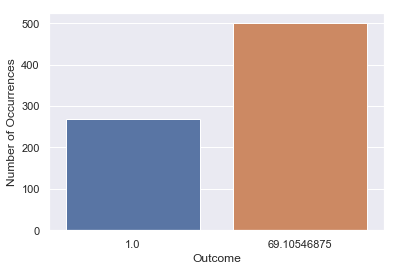

In [82]:
class_variable = pima_df['Outcome'].value_counts()

sns.barplot(class_variable.index,class_variable.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Outcome', fontsize=12)

From the counts looks like there are more  number for rows (data) for non diabetic patients than diabetic. There seems to be imbalance in the class.

#### Distribution plot:

Now, let us look at the distribution plot of some of the numeric variables.

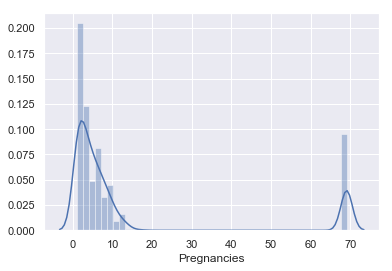

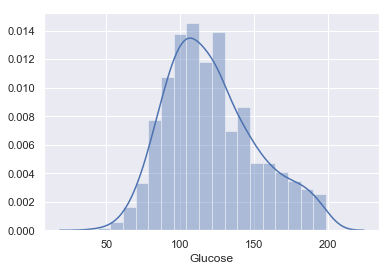

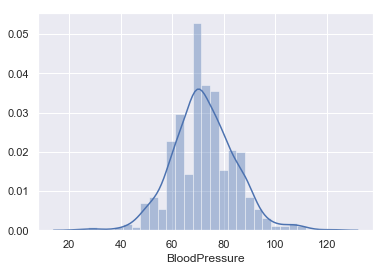

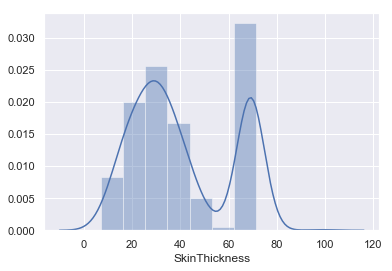

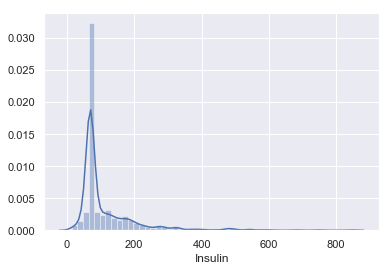

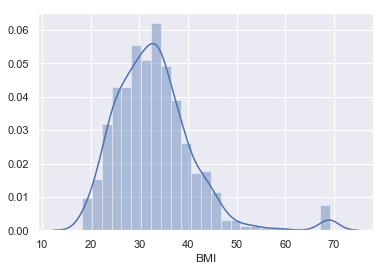

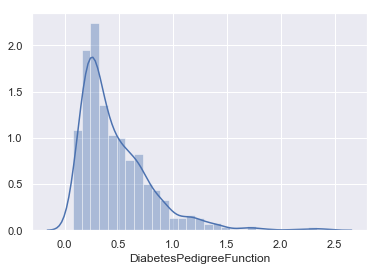

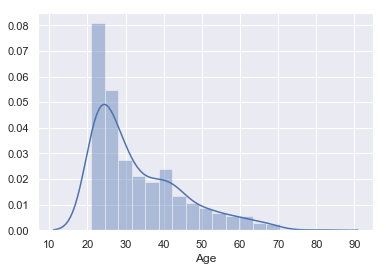

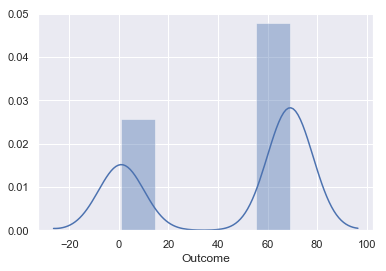

In [83]:
for col in pima_df.columns:
    sns.distplot(pima_df[col])
    plt.show()

### Observations
1. Insulin, DiabetesPedigreeFunction , Age seems to be right skewed
2. BloodPresurre and Glucose are normally distribured
3. There are outliers in pregnancies, BMI


In [ ]:
pima_df[pima_df['Glucose']>=140]['Outcome'].value_counts()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

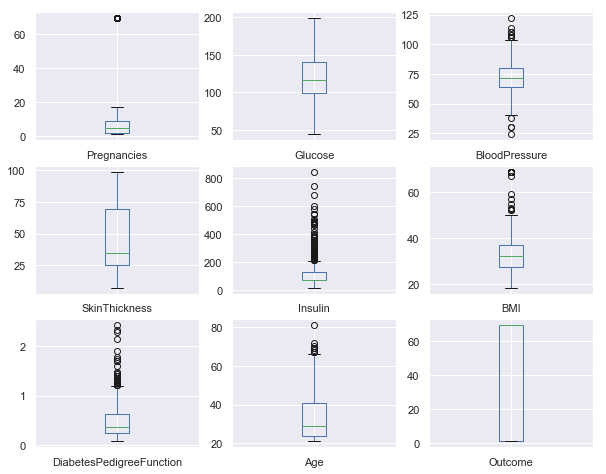

In [63]:
pima_df.plot(kind='box',subplots=True,layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

#### Bivariate Analysis

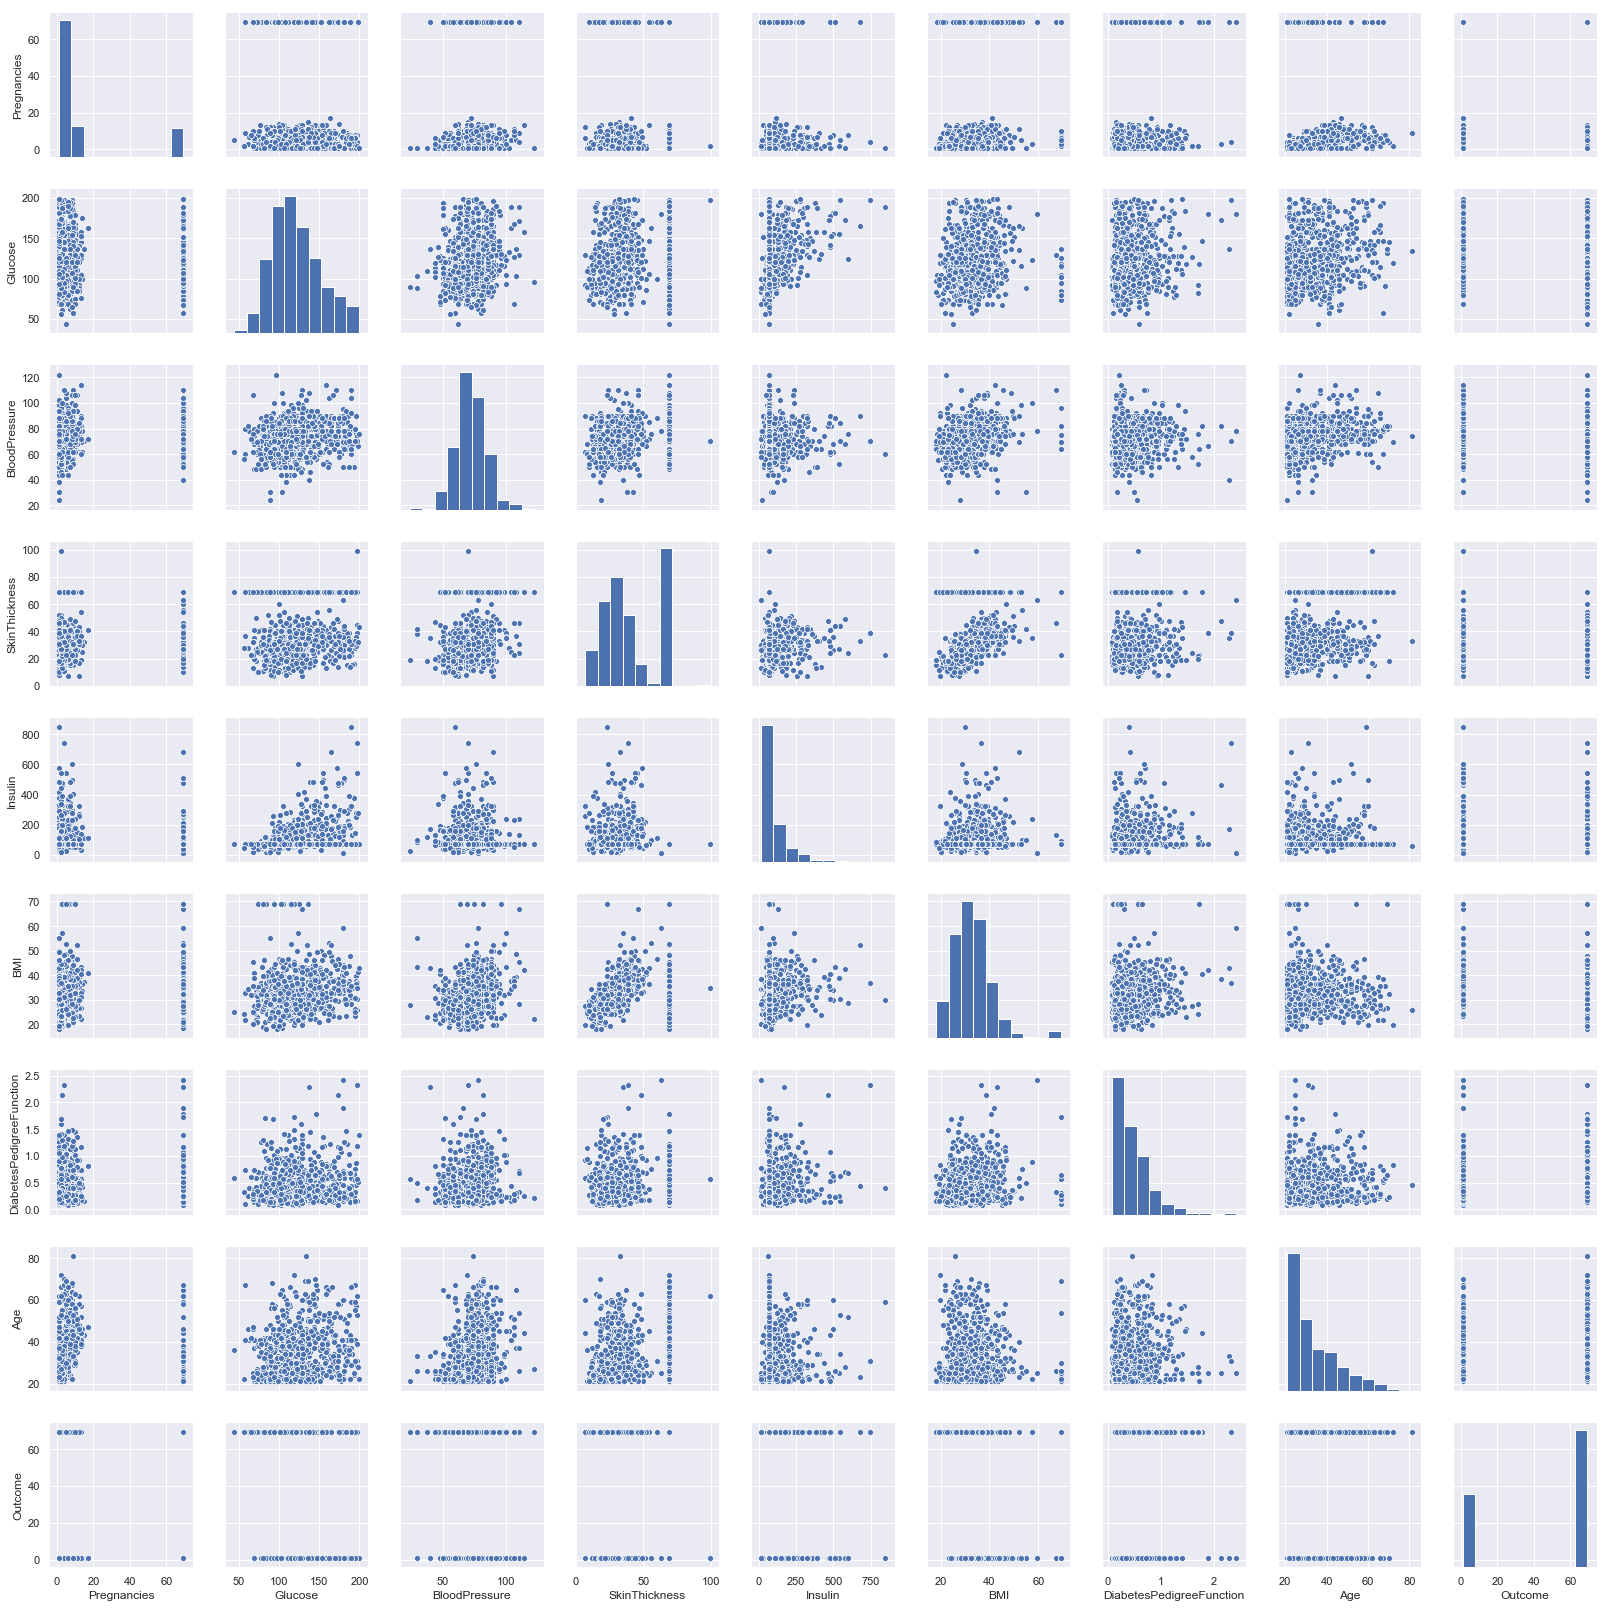

In [71]:
sns.pairplot(data=pima_df)

##### Correlation and Heatmap

In [67]:
df_corr = pima_df.corr()

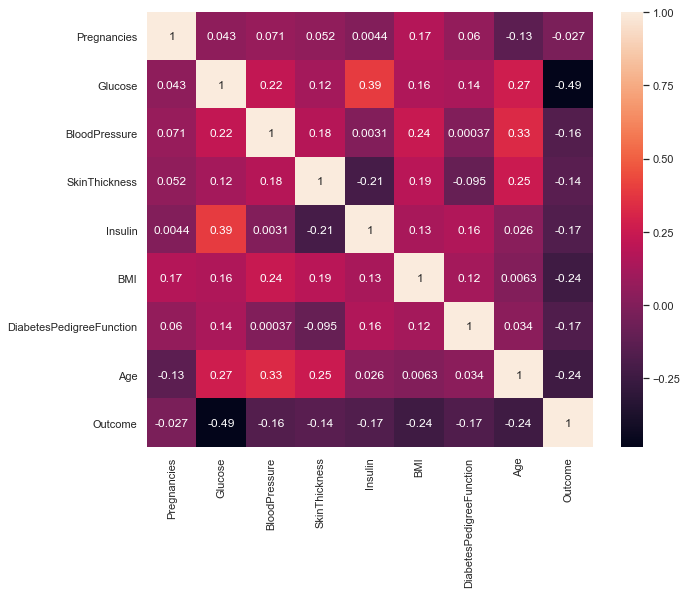

In [72]:
sns.heatmap(df_corr,annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)


### Observations:

1. The diagonal shows the distribution of the the dataset with the histogram.
2. The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.
3. The heatmap also indicates that there is no strong coorelation between any of the variables

In [85]:
from sklearn import linear_model

In [86]:
regr=linear_model.LinearRegression()
y=pima_df['Outcome']
x=pima_df[['Glucose','Age','BMI']]

In [87]:
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
regr.coef_, regr.intercept_

(array([-0.45134726, -0.33884203, -0.69096215]), 134.16095602876445)

In [91]:
regr.score(x,y)

0.2788910914918723